In [1]:
import PIL
from PIL import Image
import numpy as np
import pandas as pd
import os

train_path = 'train'

In [2]:
from matplotlib import pyplot as plt
def to_plot(img):
    return np.rollaxis(img, 0, 3).astype(np.uint8)
def plot(img):
    plt.imshow(img)

In [3]:
def show_bb(i):
    img = PIL.Image.open(train_path+ "\\" + filenames[i])
    bb = bb_json[filenames[i].split('/')[-1]][0]
    plt.figure(figsize=(6,6))
    s = img.size
    plot(img)
    ax=plt.gca()
    ax.add_patch(create_rect([bb['x'],bb['y'],bb['width'],bb['height']], 'yellow'))
    
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[0], bb[1]), bb[2], bb[3], color=color, fill=False, lw=3)

In [4]:
bb_json = {}

j = pd.read_table('Type_3_bbox.tsv',sep = " ",
               header = None,
               usecols = range(6),
               names = ['filename','nbox','x','y','width','height'])
# j['y']=j['ymin']+j['height']
filenames=[]
for index, l in j.iterrows():
    filenames.append(l['filename'])
    bb_json[l['filename'].split('/')[-1]] = sorted(
          [l[['height', 'width', 'x', 'y']].to_dict()],
        key = lambda var: var['width']*var['height']
        )
print(l[['x','y','width','height']].to_dict())

{'x': 744, 'y': 1381, 'width': 806, 'height': 853}


In [22]:
bb = (j[j.filename==os.path.join("Type_3", "1000.jpg")])
print (bb.x.values)

[944]


In [11]:
j

,filename,nbox,x,y,width,height
0,Type_3\1000.jpg,1,944,952,544,506
1,Type_3\1003.jpg,1,906,1431,536,398
2,Type_3\1004.jpg,1,1280,1372,524,457
3,Type_3\1007.jpg,1,558,1356,1028,730
4,Type_3\1008.jpg,1,1224,1455,810,637
...,...,...,...,...,...,...
440,Type_3\983.jpg,1,826,1400,888,806
441,Type_3\986.jpg,1,462,809,862,940
442,Type_3\993.jpg,1,622,775,1018,965
443,Type_3\995.jpg,1,586,738,872,785


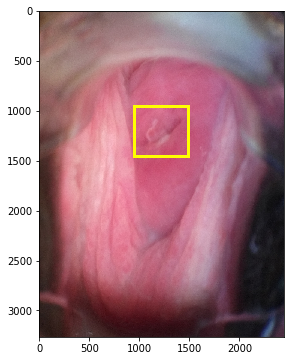

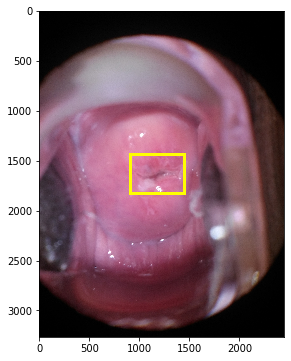

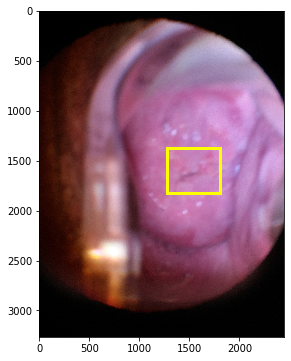

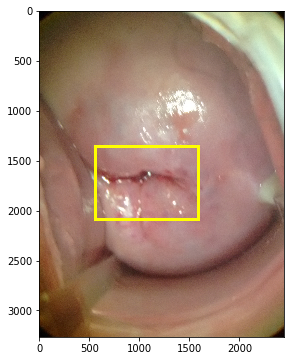

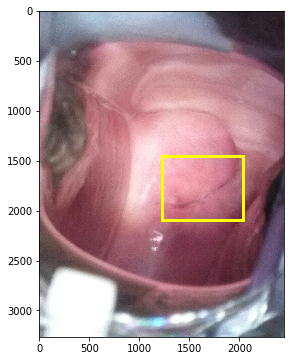

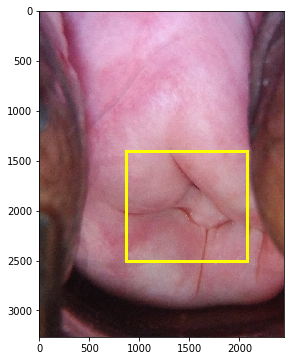

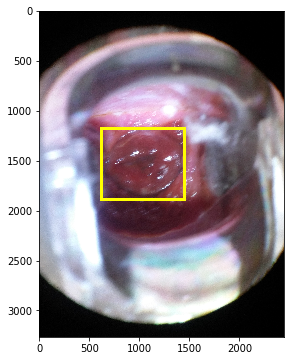

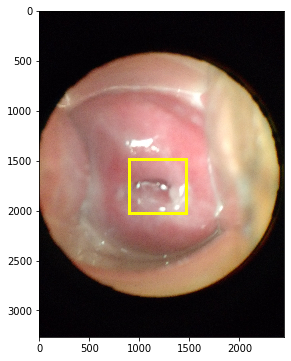

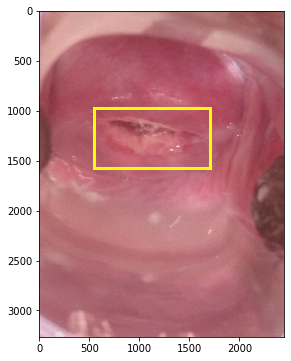

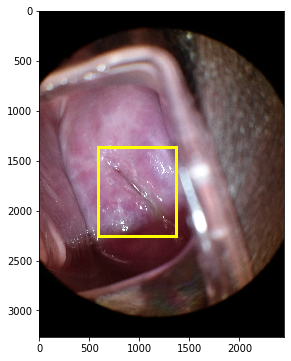

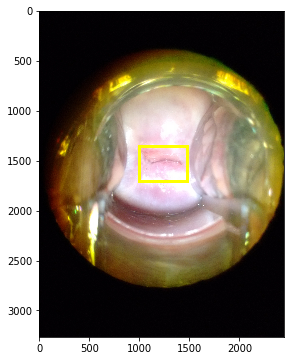

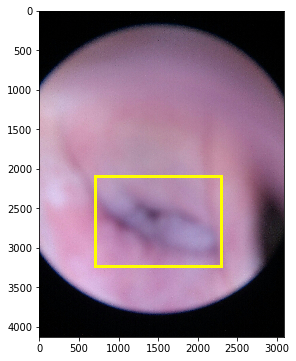

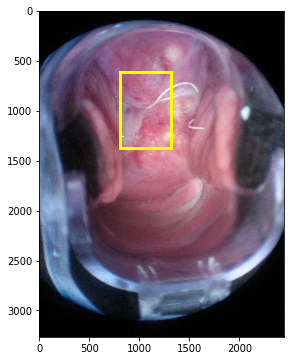

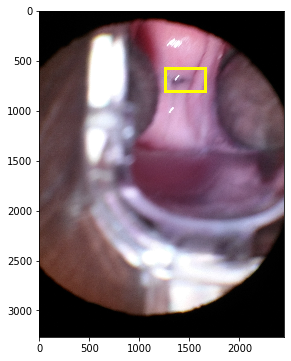

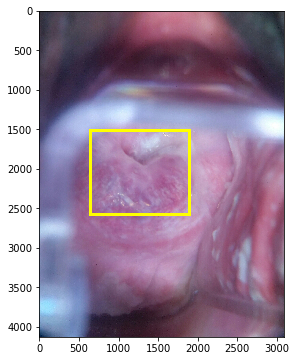

In [52]:
for i in range(15):
    show_bb(i)